# Demo


In [15]:
from dust import *
from halo import *

from matplotlib import pyplot as plt

E = 2.71828
N_H = 1e22
theta = 10

In [109]:
def compare_to_shalo(shalo_I, thetas, halo):
    fig, axes = plt.subplots(2,1, figsize = (9,7))
    plt.subplots_adjust(hspace=0.3)
    xhalo_I = halo.I(thetas)
    print(f"shalo: {shalo_I}")
    print(f"xhalo: {xhalo_I}")

    axes[0].set_xlabel(r"$\theta_{obs}$")
    axes[0].set_ylabel(r"Intensity")
    axes[0].plot(thetas,xhalo_I,color="magenta", label="xhalo", linestyle="dashed")
    axes[0].plot(thetas,shalo_I,color="teal", label="shalo", alpha = .7)
    axes[0].legend()

    axes[1].set_ylabel("xhalo/shalo")
    axes[1].set_xlabel(r"$\theta_{obs}$")
    axes[1].plot(thetas, xhalo_I/shalo_I, color="teal")

    plt.show()

In [42]:
silicate = Silicate()
graphite = Graphite()

In [43]:
graphite.henke_F(E)

array(1.03685344)

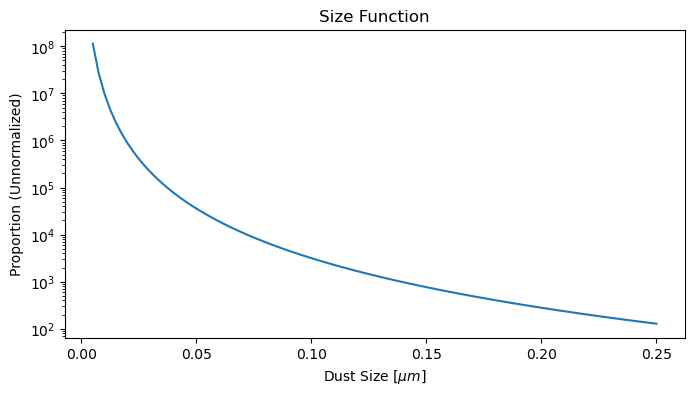

In [44]:
silicate.plot_size_func()

### Gauss RG


In [45]:
halo = Halo(N_H, E, [silicate,graphite])

In [46]:
halo.dsigma_dOmega(.1, silicate, 10)

3.2691119949702862e-12

In [47]:
halo.dust_I(silicate, 20)

0.014741020195002523

In [48]:
halo.dust_I(graphite, 20)

0.005594815420960086

In [49]:
halo.I(10)

array([0.04351015])

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

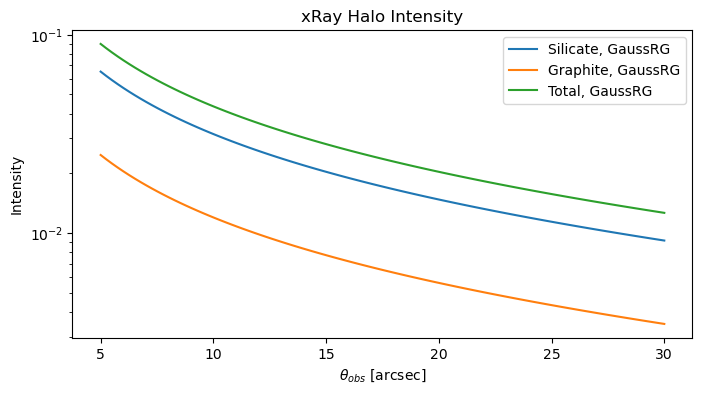

In [50]:
halo.plot_I()

gauss RG
shalo: [0.0435039, 0.0203329, 0.0126232, 0.0087838, 0.00649607]
xhalo: [0.04351015 0.02033584 0.01262505 0.00878505 0.006497  ]


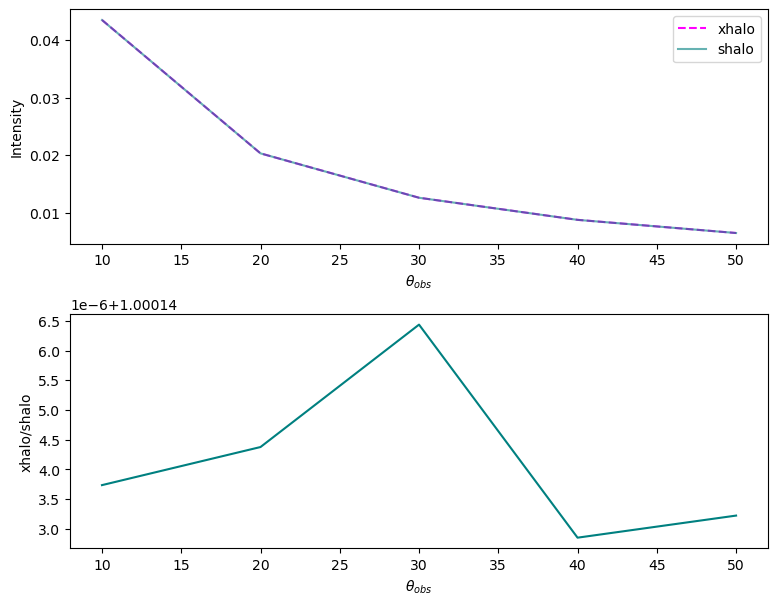

In [110]:
print("gauss RG")
thetas = [10,20,30,40,50]
shalo_I = [0.0435039, 0.0203329, 0.0126232, 0.0087838, 0.00649607]
compare_to_shalo(shalo_I, thetas, halo)

### Exact RG


In [89]:
N_H = 1e22
E = 2
exact_halo = Halo(N_H, E, [silicate,graphite], scatter_model="ExactRG")

In [90]:
exact_halo.dsigma_dOmega(.1, silicate, 10)

4.2916851097795616e-12

In [91]:
exact_halo.I(10)

array([0.05815397])

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

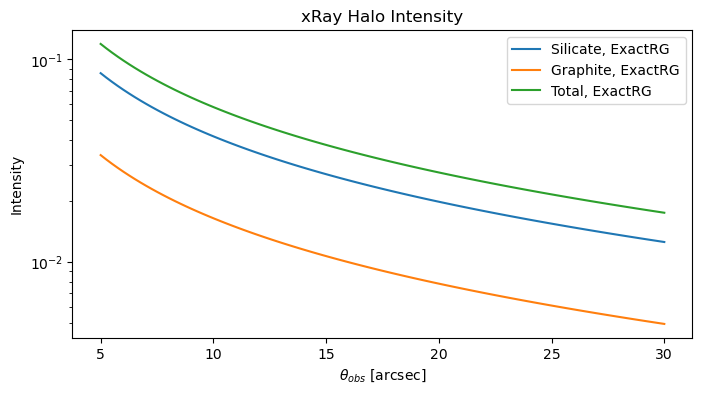

In [92]:
exact_halo.plot_I()

exact RG
shalo: [0.0581458, 0.0276599, 0.0175051, 0.0124358, 0.00940263]
xhalo: [0.05815397 0.02766379 0.0175076  0.01243754 0.00940395]


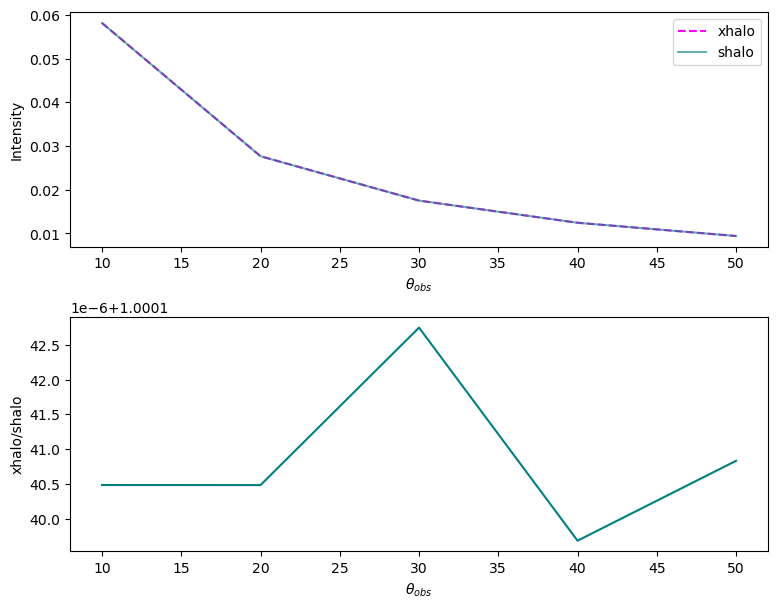

In [114]:
print("exact RG")
thetas = [10,20,30,40,50]
shalo_I = [0.0581458, 0.0276599, 0.0175051, 0.0124358, 0.00940263]
compare_to_shalo(shalo_I, thetas, exact_halo)

### Mie


In [ ]:
E=1
NH = 1e22
mie_halo = Halo(N_H, E, [silicate,graphite], scatter_model="Mie")
mie_halo.I(10)

array([0.09455965])

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

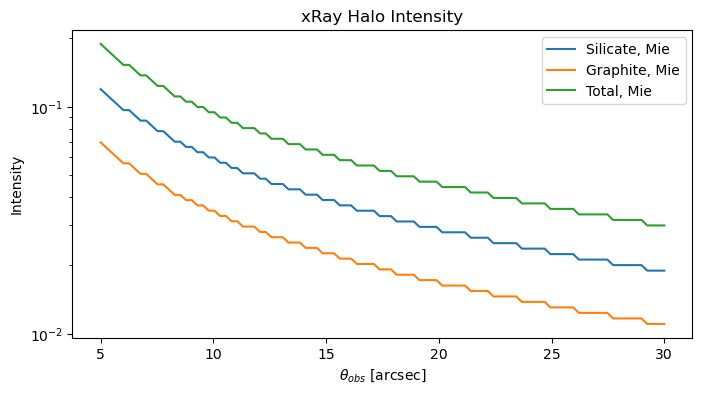

In [112]:
mie_halo.plot_I()

mie
shalo: [0.0907183, 0.0450611, 0.0294816, 0.0216096, 0.0168714]
xhalo: [0.09455965 0.046736   0.02997111 0.02128534 0.01687338]


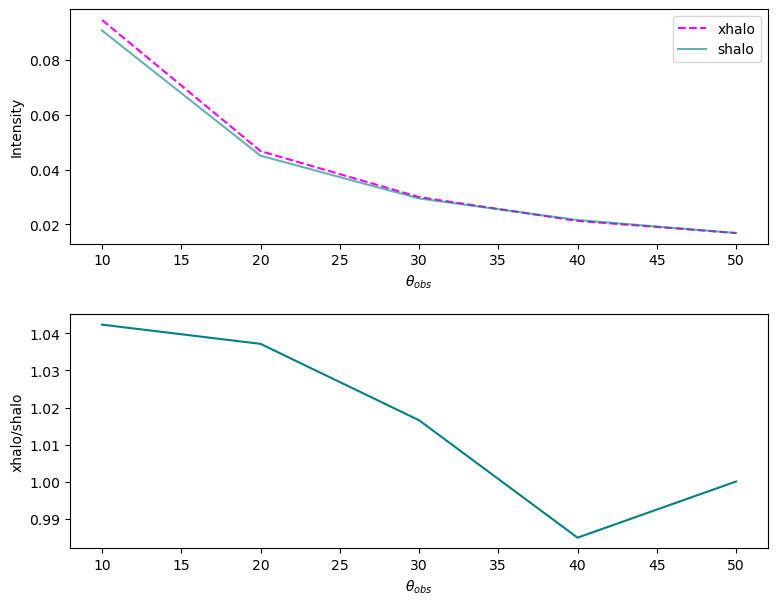

In [122]:
print("mie")
thetas = [10,20,30,40,50]
shalo_I = [0.0907183, 0.0450611, 0.0294816, 0.0216096, 0.0168714]

compare_to_shalo(shalo_I, thetas, mie_halo)

## WD


In [119]:
from halo import *
from dust import *

E = 2
N_H = 1e22
theta = 10

wd_silicate = Silicate_WD()
wd_graphite = Graphite_WD()

halo = Halo(N_H, E, [wd_silicate, wd_graphite], scatter_model="GaussRG")
halo.I([10, 20, 30, 40, 50])

array([0.12702707, 0.05884724, 0.03620329, 0.02496906, 0.01831497])

gauss WD
shalo: [0.115955, 0.0538686, 0.0332417, 0.0230009, 0.0169283]
xhalo: [0.12702707 0.05884724 0.03620329 0.02496906 0.01831497]


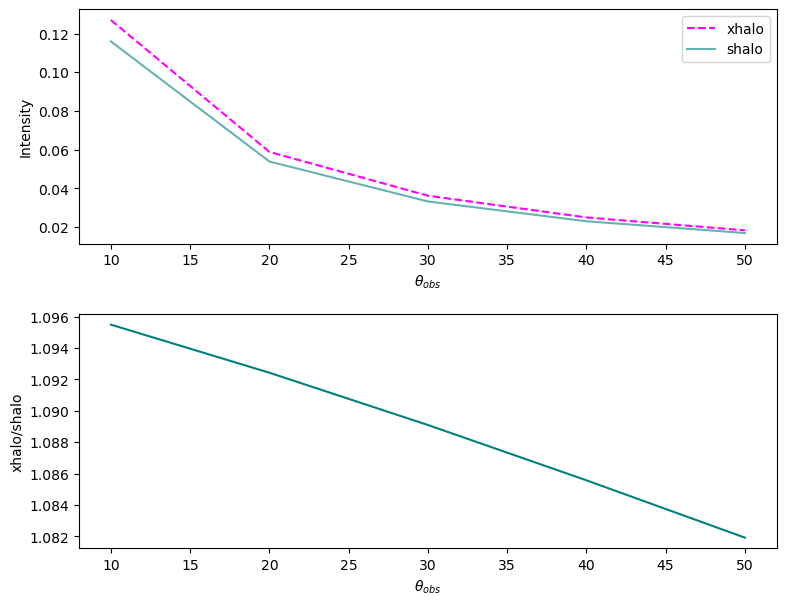

In [121]:
print("gauss WD")
thetas = [10,20,30,40,50]
shalo_I = [0.115955, 0.0538686, 0.0332417, 0.0230009, 0.0169283]

compare_to_shalo(shalo_I, thetas, halo)

## Plot Stacking


In [18]:
E = 1
N_H = 1e22
theta = 10

gauss_halo2 = Halo(N_H, E, [silicate,graphite])
exact_halo2 = Halo(N_H, E, [silicate,graphite], scatter_model="ExactRG")
mie_halo2 = Halo(N_H, E, [silicate,graphite], scatter_model="Mie")

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'xRay Halo Intensity'}, xlabel='$\\theta_{obs}$ [arcsec]', ylabel='Intensity'>)

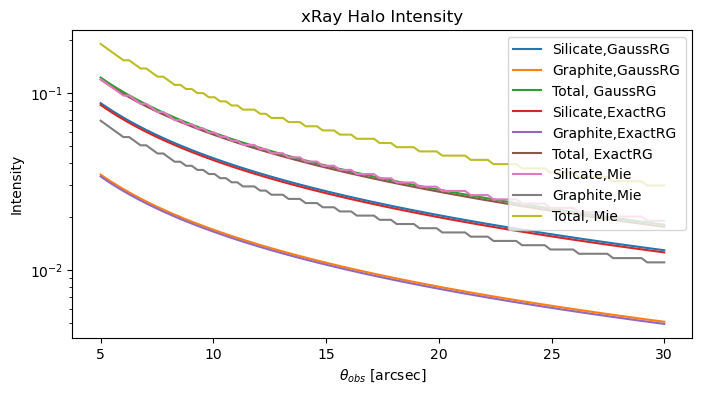

In [19]:
figax = halo.plot_I()
figax = exact_halo.plot_I(figax=figax)
mie_halo.plot_I(figax=figax)

# Workspace


In [18]:
from astropy.io import fits
from astropy.table import Table

In [19]:
hdu = fits.open("dust_data/DsdO_3.30.fits")

In [20]:
hdu.info()

Filename: dust_data/DsdO_3.30.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  H             1 BinTableHDU     36   533664R x 4C   [1E, 1E, 1E, 1E]   


In [21]:
hdu1 = hdu[1]

In [22]:
hdu[1].columns

ColDefs(
    name = 'Energy'; format = '1E'; unit = 'keV'
    name = 'Size'; format = '1E'; unit = 'um'
    name = 'ThetaObs'; format = '1E'; unit = 'arcsec'
    name = 'Intensity'; format = '1E'; unit = 'cm^2 arcmin^-2'
)

In [23]:
df = Table(hdu1.data).to_pandas()
df

,Energy,Size,ThetaObs,Intensity
0,0.300,0.005,5.000000,6.285660e-26
1,0.300,0.005,5.269294,5.879412e-26
2,0.300,0.005,5.553093,5.502271e-26
3,0.300,0.005,5.852177,5.154870e-26
4,0.300,0.005,6.167368,4.840606e-26
...,...,...,...,...
533659,1.475,0.545,810.718628,3.165237e-28
533660,1.475,0.545,854.382996,2.619681e-28
533661,1.475,0.545,900.399109,2.353275e-28
533662,1.475,0.545,948.893677,1.780529e-28
